•	Add salt and pepper noise and then perform median filtering

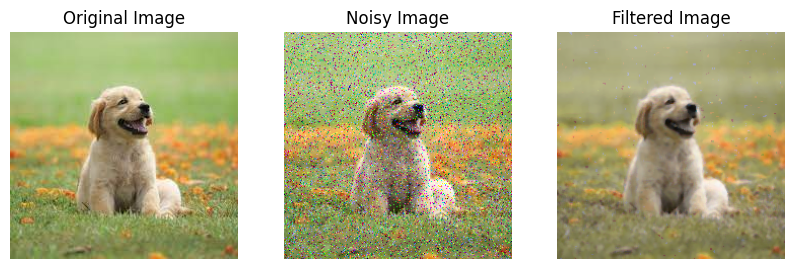

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    noisy_image = np.copy(image)
    salt_mask = np.random.random(image.shape) < salt_prob
    pepper_mask = np.random.random(image.shape) < pepper_prob
    noisy_image[salt_mask] = 255
    noisy_image[pepper_mask] = 0
    return noisy_image

def median_filter(image, kernel_size):
    filtered_image = ndimage.median_filter(image, size=kernel_size)
    return filtered_image

# Load the image
image_path = "/content/dog.jpg"
original_image = plt.imread(image_path)

# Add salt and pepper noise
salt_prob = 0.05  # Probability of adding salt noise
pepper_prob = 0.05  # Probability of adding pepper noise
noisy_image = add_salt_and_pepper_noise(original_image, salt_prob, pepper_prob)

# Perform median filtering
kernel_size = 3  # Size of the median filter kernel
filtered_image = median_filter(noisy_image, kernel_size)

# Display the images
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image')
plt.axis('off')

plt.show()


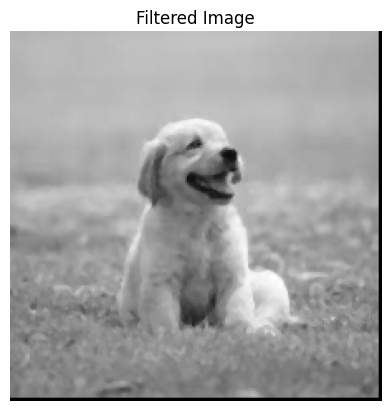

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def median_filter(image):
    padded_image = np.pad(image, ((1, 1), (1, 1)), mode='symmetric')  # Padding the image
    filtered_image = np.zeros_like(image)

    for i in range(1, image.shape[0] - 1):  # Adjusted loop limits
        for j in range(1, image.shape[1] - 1):  # Adjusted loop limits
            # Extract pixel values
            pixel_values = padded_image[i-1:i+2, j-1:j+2].flatten()

            # Sort pixel values
            sorted_values = np.sort(pixel_values)

            # Get median value
            median_value = sorted_values[4]  # 4 is the index of the median value

            # Assign median value to filtered image
            filtered_image[i-1, j-1] = median_value  # Corrected indexing for filtered_image

    return filtered_image

# Load the image
image_path = "/content/dog.jpg"  # Image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Perform median filtering
filtered_image = median_filter(image)

# Display the filtered image using Matplotlib
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image')
plt.axis('off')  # Turn off axis
plt.show()


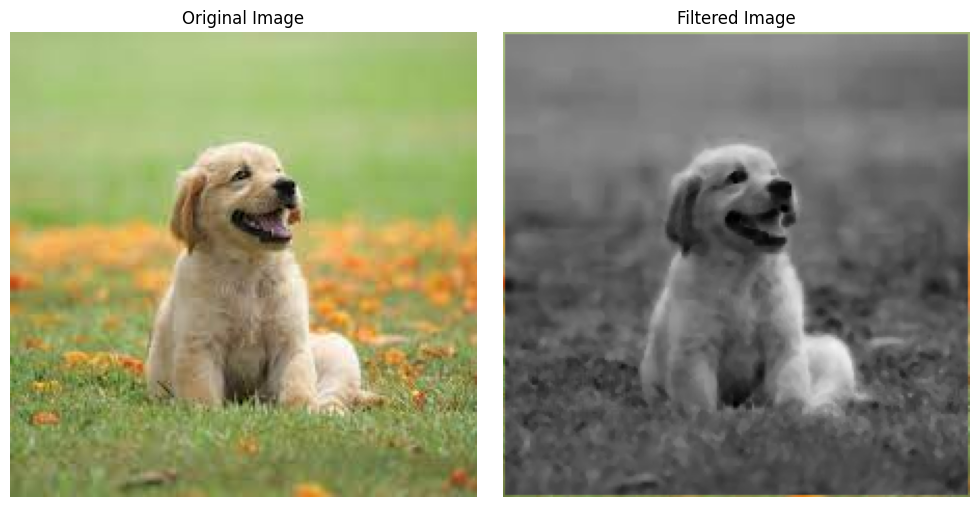

In [ ]:
import cv2
import matplotlib.pyplot as plt

def median_filter(image):
    padded_image = cv2.copyMakeBorder(image, 1, 1, 1, 1, cv2.BORDER_REPLICATE)  # Padding the image
    filtered_image = image.copy()

    for i in range(1, image.shape[0] - 1):  # Adjusted loop limits
        for j in range(1, image.shape[1] - 1):  # Adjusted loop limits
            # Extract pixel values
            pixel_values = padded_image[i-1:i+2, j-1:j+2].flatten()

            # Sort pixel values
            sorted_values = sorted(pixel_values)

            # Get median value
            median_value = sorted_values[4]  # 4 is the index of the median value

            # Assign median value to filtered image
            filtered_image[i, j] = median_value

    return filtered_image

# Load the image
image_path = "/content/dog.jpg"  # Image path
image = cv2.imread(image_path)  # Load image in color mode

# Convert the image to RGB (matplotlib uses RGB)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Perform median filtering
filtered_image = median_filter(image_rgb)

# Create a figure and set its size
plt.figure(figsize=(10, 5))

# Display the original image on the left-hand side corner
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')  # Turn off axis

# Display the filtered image on the right-hand side
plt.subplot(1, 2, 2)
plt.imshow(filtered_image)
plt.title('Filtered Image')
plt.axis('off')  # Turn off axis

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


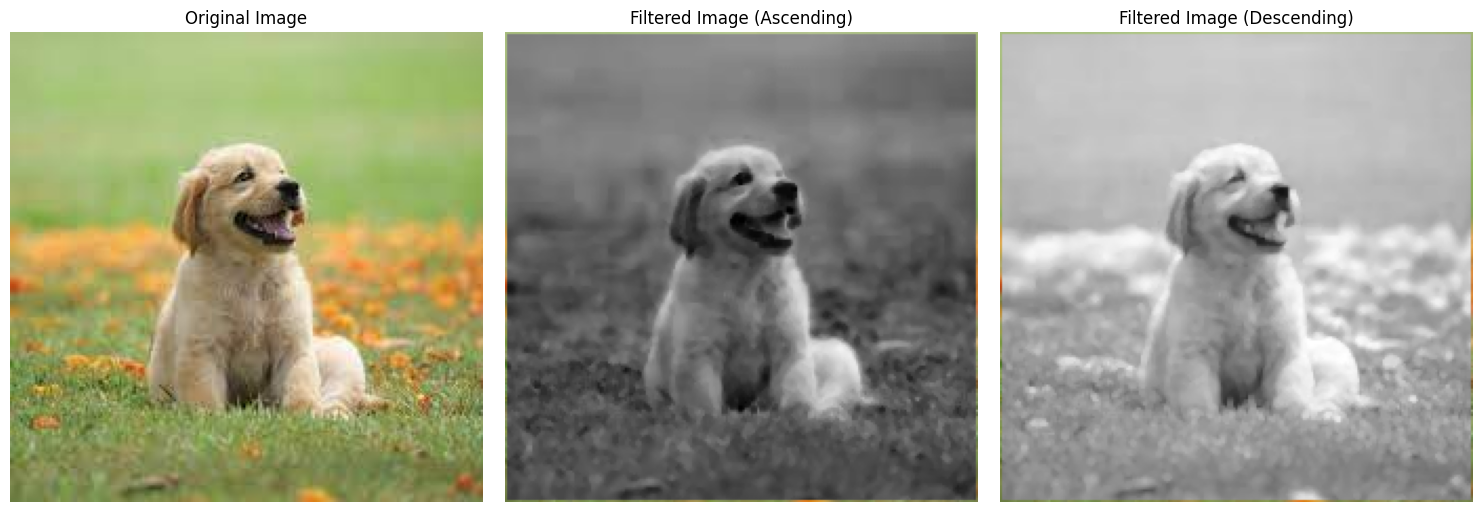

In [ ]:
import cv2
import matplotlib.pyplot as plt

def median_filter(image, ascending=True):
    padded_image = cv2.copyMakeBorder(image, 1, 1, 1, 1, cv2.BORDER_REPLICATE)  # Padding the image
    filtered_image = image.copy()

    for i in range(1, image.shape[0] - 1):  # Adjusted loop limits
        for j in range(1, image.shape[1] - 1):  # Adjusted loop limits
            # Extract pixel values
            pixel_values = padded_image[i-1:i+2, j-1:j+2].flatten()

            # Sort pixel values
            if ascending:
                sorted_values = sorted(pixel_values)  # Ascending order
            else:
                sorted_values = sorted(pixel_values, reverse=True)  # Descending order

            # Get median value
            median_value = sorted_values[4]  # 4 is the index of the median value

            # Assign median value to filtered image
            filtered_image[i, j] = median_value

    return filtered_image

# Load the image
image_path = "/content/dog.jpg"  # Image path
image = cv2.imread(image_path)  # Load image in color mode

# Convert the image to RGB (matplotlib uses RGB)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Perform median filtering with ascending order
filtered_image_ascending = median_filter(image_rgb, ascending=True)

# Perform median filtering with descending order
filtered_image_descending = median_filter(image_rgb, ascending=False)

# Create a figure and set its size
plt.figure(figsize=(15, 5))

# Display the original image on the left-hand side corner
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')  # Turn off axis

# Display the filtered image with ascending order in the middle
plt.subplot(1, 3, 2)
plt.imshow(filtered_image_ascending)
plt.title('Filtered Image (Ascending)')
plt.axis('off')  # Turn off axis

# Display the filtered image with descending order on the right-hand side
plt.subplot(1, 3, 3)
plt.imshow(filtered_image_descending)
plt.title('Filtered Image (Descending)')
plt.axis('off')  # Turn off axis

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


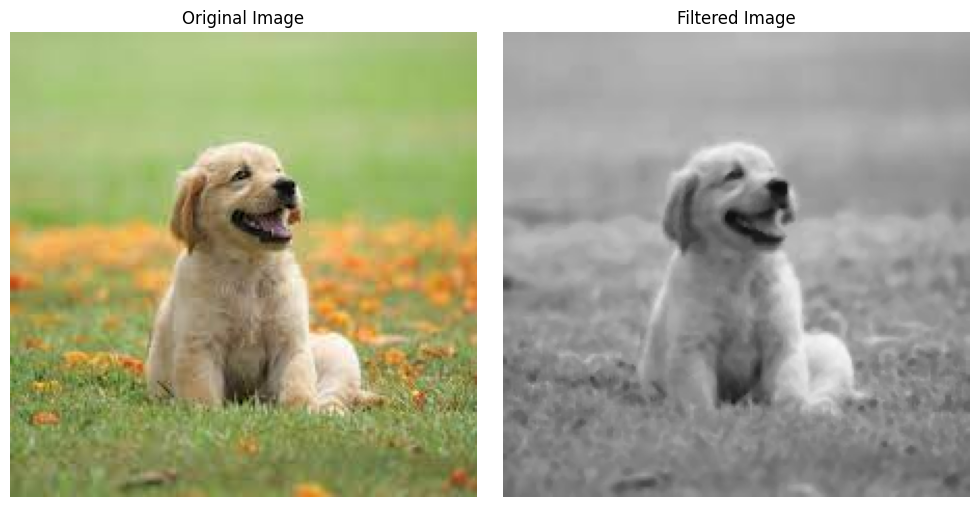

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def median_filter(image):
    # Create an output image with the same dimensions as the input image
    filtered_image = np.zeros_like(image)

    # Iterate over each pixel in the image
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Extract a 3x3 neighborhood around the current pixel
            neighborhood = image[max(0, i-1):min(image.shape[0], i+2), max(0, j-1):min(image.shape[1], j+2)]

            # Compute the median of the pixel values in the neighborhood
            median_value = np.median(neighborhood)

            # Assign the median value to the corresponding pixel in the output image
            filtered_image[i, j] = median_value

    return filtered_image

# Load the image
image_path = "/content/dog.jpg"  # Image path
image = cv2.imread(image_path)  # Load image in color mode

# Perform median filtering
filtered_image = median_filter(image)

# Display the original color image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Display the filtered image
plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image')
plt.axis('off')

plt.tight_layout()
plt.show()


Add Gaussian noise and then perform averaging filter

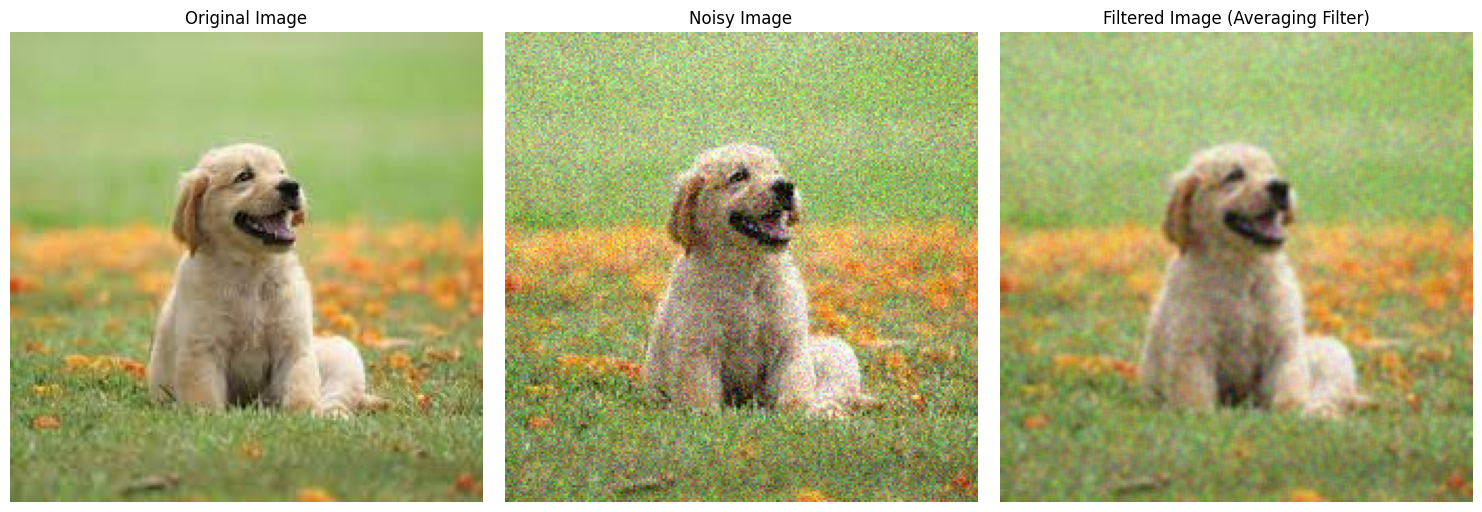

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def add_gaussian_noise(image, mean=0, sigma=25):
    """Add Gaussian noise to the image."""
    row, col, ch = image.shape
    gauss = np.random.normal(mean, sigma, (row, col, ch))
    gauss = gauss.reshape(row, col, ch)
    noisy_image = image + gauss
    return np.clip(noisy_image, 0, 255).astype(np.uint8)

def average_filter(image, kernel_size=3):
    """Apply an average filter to the image."""
    return cv2.blur(image, (kernel_size, kernel_size))

# Load the image
image_path = "/content/dog.jpg"
image = cv2.imread(image_path)

# Add Gaussian noise to the image
noisy_image = add_gaussian_noise(image)

# Apply average filtering
filtered_image = average_filter(noisy_image)

# Display original, noisy, and filtered images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB))
plt.title('Filtered Image (Averaging Filter)')
plt.axis('off')

plt.tight_layout()
plt.show()


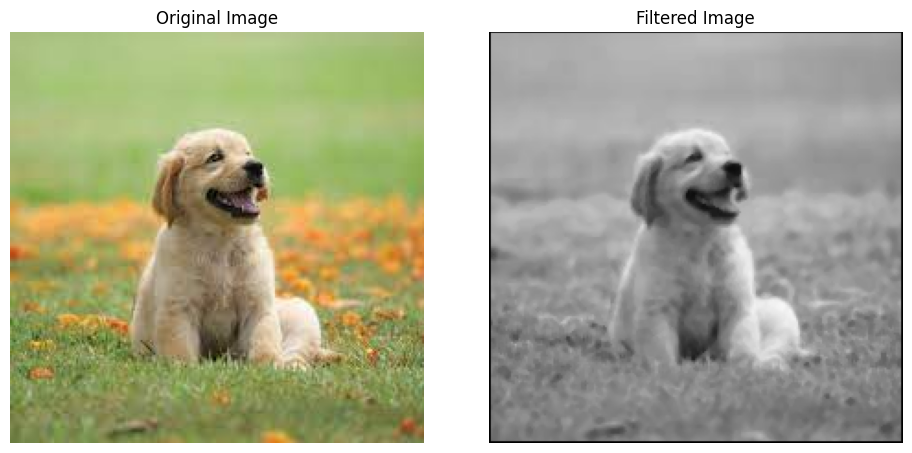

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def median_filter(image):
    # Create an output image with the same dimensions as the input image
    filtered_image = np.zeros_like(image)

    # Iterate over each pixel in the image
    for i in range(1, image.shape[0] - 1):
        for j in range(1, image.shape[1] - 1):
            # Extract a 3x3 neighborhood around the current pixel
            neighborhood = image[i - 1:i + 2, j - 1:j + 2]

            # Compute the median of the pixel values in the neighborhood
            median_value = np.median(neighborhood)

            # Assign the median value to the corresponding pixel in the output image
            filtered_image[i, j] = median_value

    return filtered_image

# Load the color image
image_path = "/content/dog.jpg"
image = cv2.imread(image_path)

# Perform median filtering
filtered_image = median_filter(image)

# Display the original and filtered images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB))
plt.title('Filtered Image')
plt.axis('off')

plt.tight_layout(pad=3.0)  # Adjust padding for better visualization

plt.show()


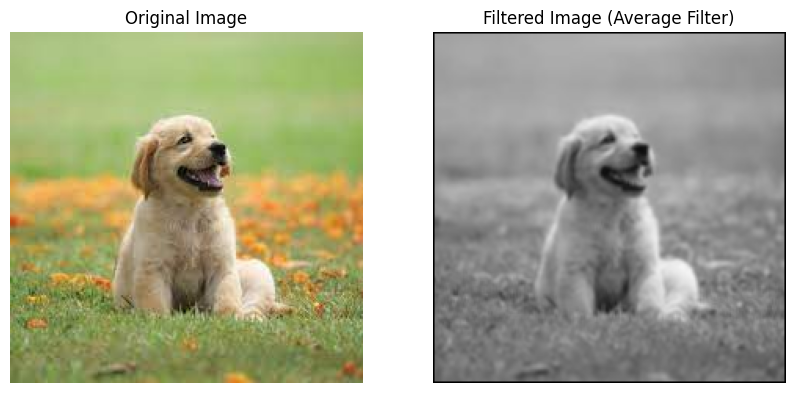

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def average_filter(image):
    # Create an output image with the same dimensions as the input image
    filtered_image = np.zeros_like(image)

    # Iterate over each pixel in the image
    for i in range(1, image.shape[0] - 1):
        for j in range(1, image.shape[1] - 1):
            # Extract a 3x3 neighborhood around the current pixel
            neighborhood = image[i - 1:i + 2, j - 1:j + 2]

            # Compute the average of the pixel values in the neighborhood
            average_value = np.mean(neighborhood)

            # Assign the average value to the central pixel in the output image
            filtered_image[i, j] = average_value

    return filtered_image

# Load the color image
image_path = "/content/dog.jpg"
image = cv2.imread(image_path)

# Perform average filtering
filtered_image = average_filter(image)

# Display the original and filtered images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for Matplotlib
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image (Average Filter)')
plt.axis('off')

plt.show()
